<a href="https://colab.research.google.com/github/ganesh-7985/crop_yield_predictions/blob/main/Crop_Yeild_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv('/content/yield_df.csv')

In [ ]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df.columns


Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.shape

(28242, 7)

In [ ]:
df.duplicated().sum()

2310

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(25932, 7)

In [ ]:
df['average_rain_fall_mm_per_year']

,average_rain_fall_mm_per_year
0,1485.0
1,1485.0
2,1485.0
3,1485.0
4,1485.0
5,1485.0
6,1485.0
7,1485.0
8,1485.0
9,1485.0


In [ ]:
def isStr(obj):
  try:
    float(obj)
    return False
  except:
      return True

In [ ]:
to_drop=df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [ ]:
df=df.drop(to_drop)

<Axes: xlabel='count', ylabel='Area'>

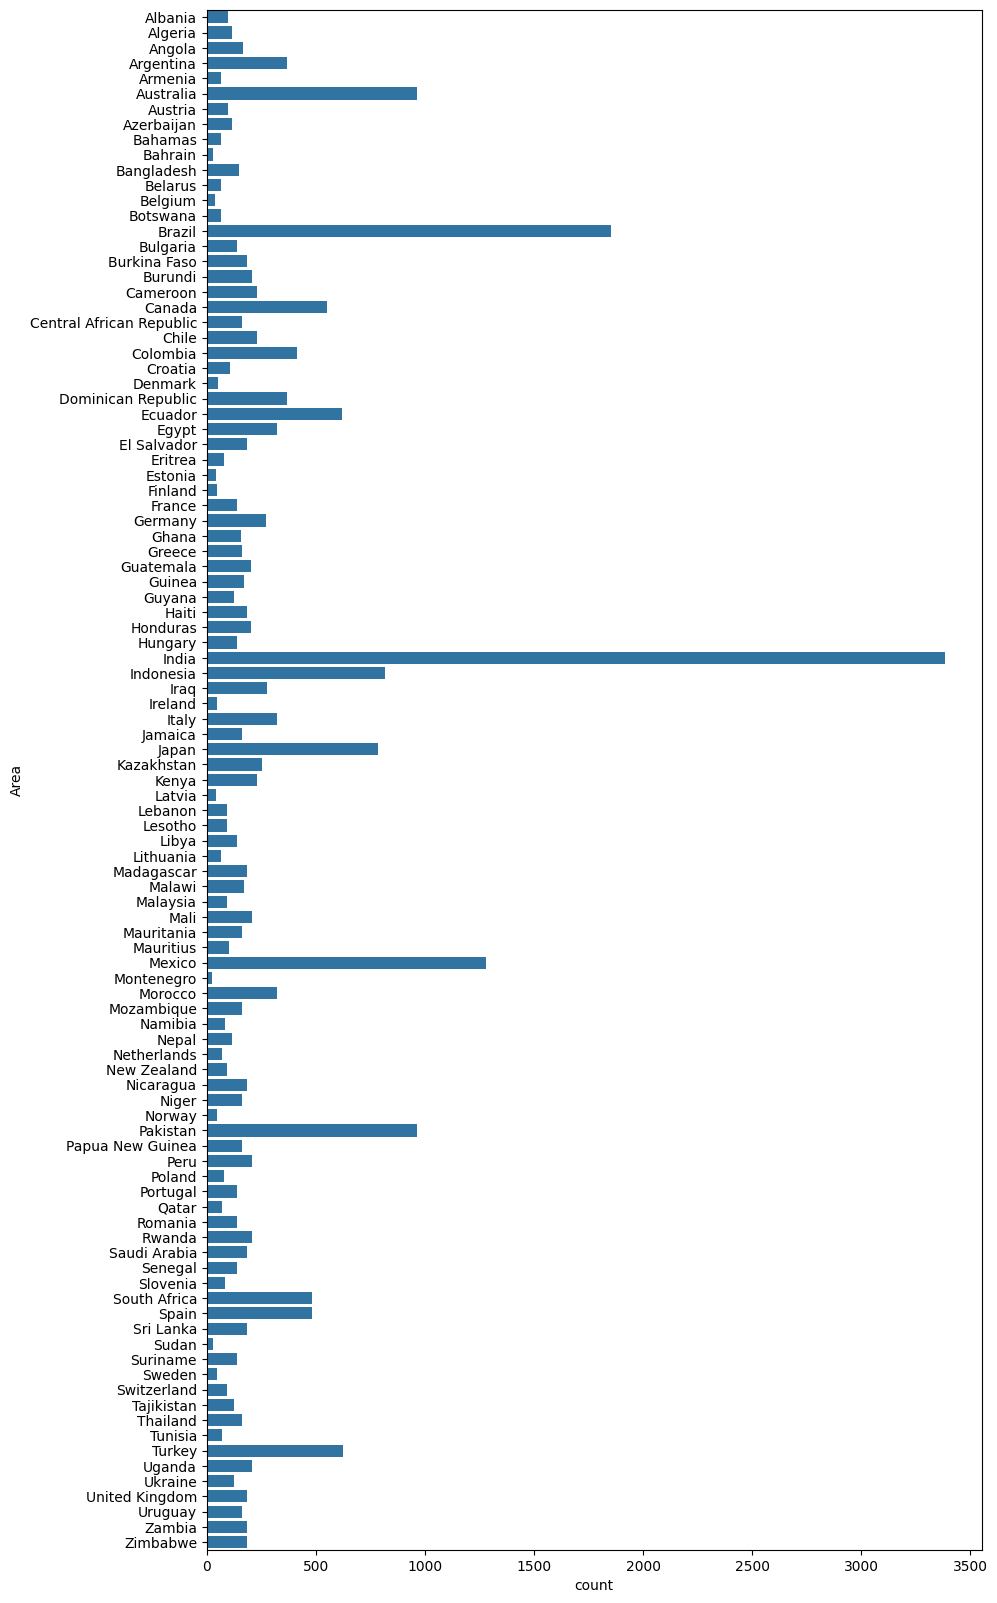

In [ ]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['Area'])

In [ ]:
#Yield Vs Item
crops = (df['Item'].unique())
Yeild_per_item = []
for crop in crops:
  Yeild_per_item.append(df[df['Item']==crop]['hg/ha_yield'].sum())

In [ ]:
Yeild_per_item

[142020761,
 785921609,
 127646024,
 52906376,
 49957039,
 106614786,
 275132269,
 310269345,
 58958974,
 86769760]

<Axes: >

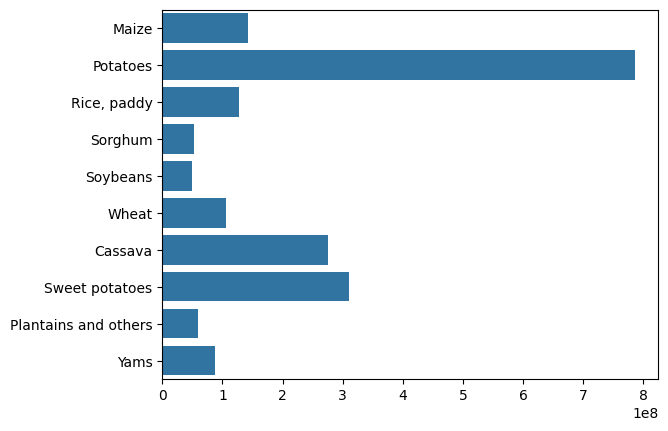

In [ ]:
sns.barplot(y=crops,x=Yeild_per_item)

In [ ]:
# Train Test split
x=df.drop('hg/ha_yield',axis=1)
y=df['hg/ha_yield']

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape,X_test.shape)


(20745, 6) (5187, 6)


In [ ]:
X_train
# ML model cannot understand the categorical string values it can only understand the numerical values so we change the columns values into number by using the methods like label encoder,ordinal encoder and hot-encoding method

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
24234,Saudi Arabia,Sorghum,2000,59.0,3024.11,26.55
9468,Greece,Sweet potatoes,2012,652.0,8002.20,18.82
6793,Colombia,Maize,2006,3240.0,98328.63,27.51
28212,Zimbabwe,Potatoes,2010,657.0,3305.17,21.17
7358,Dominican Republic,Sweet potatoes,2007,1410.0,5689.80,27.08
...,...,...,...,...,...,...
23678,Portugal,Sweet potatoes,2004,854.0,16942.00,16.31
5960,Canada,Wheat,2006,537.0,36572.75,7.85
860,Australia,Potatoes,1991,534.0,17866.00,18.73
17223,Kazakhstan,Potatoes,1998,250.0,6416.14,6.94


In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()

In [ ]:
preprocesser = ColumnTransformer(
 transformers=[
        ('onehotencoder',ohe,[0,1]),
        ('standardization',scaler,[2,3,4,5])
    ],
 remainder='passthrough'
)

In [ ]:
preprocesser


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 [0, 1]),
                                ('standardization', StandardScaler(),
                                 [2, 3, 4, 5])])

In [ ]:
X_train_dummy = preprocesser.fit_transform(X_train)

In [ ]:
X_test_dummy = preprocesser.transform(X_test)

In [ ]:
print(X_train_dummy)

  (0, 80)	1.0
  (0, 104)	1.0
  (0, 109)	-0.2192607251952932
  (0, 110)	-1.5154987688799297
  (0, 111)	-0.5526882411539445
  (0, 112)	0.9498429840115427
  (1, 34)	1.0
  (1, 106)	1.0
  (1, 109)	1.4833646703415404
  (1, 110)	-0.6883350708088464
  (1, 111)	-0.46467845130110214
  (1, 112)	-0.2502305146463679
  (2, 21)	1.0
  (2, 100)	1.0
  (2, 109)	0.6320519725731236
  (2, 110)	2.921613749777938
  (2, 111)	1.1322412754329432
  (2, 112)	1.0988818661217103
  (3, 99)	1.0
  (3, 102)	1.0
  (3, 109)	1.1995937710854017
  (3, 110)	-0.681360672005549
  (3, 111)	-0.5477192607747149
  (3, 112)	0.11460424885247963
  (4, 24)	1.0
  :	:
  (20740, 111)	-0.3066278898756476
  (20740, 112)	-0.6399050918302434
  (20741, 18)	1.0
  (20741, 107)	1.0
  (20741, 109)	0.6320519725731236
  (20741, 110)	-0.8487462432846888
  (20741, 111)	0.04043256547041621
  (20741, 112)	-1.9533102404260936
  (20742, 4)	1.0
  (20742, 102)	1.0
  (20742, 109)	-1.4962297718479185
  (20742, 110)	-0.8529308825666674
  (20742, 111)	-0.290292

In [ ]:
#Training models
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'rg':Ridge(),
    'knr':KNeighborsRegressor(),
    'dtr':DecisionTreeRegressor()

}

for name,model in models.items():
  model.fit(X_train_dummy,Y_train)
  y_prediction = model.predict(X_test_dummy)
  print(f"{name} MSE={mean_squared_error(Y_test,y_prediction)} score :{r2_score(Y_test,y_prediction)}")

lr MSE=1821709192.8756154 score :0.7486566530283931


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910887.43359, tolerance: 14819338848.544127
  model = cd_fast.sparse_enet_coordinate_descent(


lss MSE=1822234158.2996287 score :0.7485842229351424
rg MSE=1822556724.5245535 score :0.7485397180960003
knr MSE=127913289.53115095 score :0.9823516539090644
dtr MSE=161542969.3319838 score :0.9777117276728785


In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,Y_train)
dtr.predict(X_test_dummy)

array([167489.,  15838.,  72614., ...,  52692.,   9621., 128507.])

In [ ]:
# KNeighbourRegressor model is bestfit among the other models for this statement

In [ ]:
#Now build the predictive system
def predictions(Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp):
  features = np.array([[Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp]])

  transformed_features = preprocesser.transform(features)
  predicted_value = dtr.predict(transformed_features).reshape(1,-1)
  return predicted_value[0]

In [ ]:
Area='Saudi Arabia'
Item='Sorghum'
Year=2000
average_rain_fall_mm_per_year=59.0
pesticides_tonnes=3241.0
avg_temp=26.55

result = predictions(Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp)
print(result)

[13971.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
#Pickle files
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))